In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir='/content/drive/MyDrive/PR_thesis/dataset'

In [ ]:
train_path='/content/drive/MyDrive/PR_thesis/dataset/train'

In [ ]:
img_height,img_width=224,224
batch_size=50
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_path,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2000 files belonging to 2 classes.


In [ ]:
val_path='/content/drive/MyDrive/PR_thesis/dataset/valid'

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  val_path,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 200 files belonging to 2 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['crack', 'non crack']


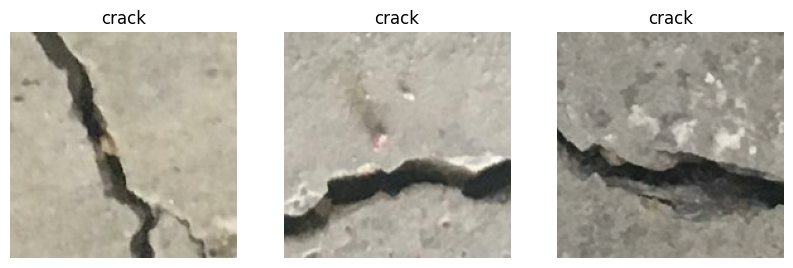

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dropout(0.2))
resnet_model.add(Dense(16))
resnet_model.add(Dense(2, activation='softmax'))

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 2048)             0         
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 16)               32784     
 pper)                                                           
                                                                 
 module_wrapper_3 (ModuleWra  (None, 2)                34        
 pper)                                                  

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
# Set up data generators for training and validation data
from tensorflow.keras.applications.resnet50 import preprocess_input
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,

)

valid_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)


train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/PR_thesis/dataset/train',
    target_size=(224, 224),  # Provide target_size as a tuple
    batch_size=batch_size,
    class_mode='binary'
)


valid_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/PR_thesis/dataset/valid',
    target_size=(225, 225),  # Provide target_size as a tuple
    batch_size=batch_size,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:

# Set up hyperparameters
BATCH_SIZE = 50
EPOCHS = 10
LEARNING_RATE = 0.001
IMAGE_SIZE = (224, 224)
NUM_CLASSES = 2

In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
r = resnet_model.fit(train_generator, validation_data=valid_generator, epochs=EPOCHS)

Epoch 1/10
40/40 [==============================] - 435s 11s/step - loss: 0.0633 - accuracy: 0.9755 - val_loss: 0.0505 - val_accuracy: 0.9900
Epoch 2/10
40/40 [==============================] - 9s 228ms/step - loss: 0.0129 - accuracy: 0.9955 - val_loss: 0.0584 - val_accuracy: 0.9850
Epoch 3/10
40/40 [==============================] - 9s 231ms/step - loss: 0.0046 - accuracy: 0.9995 - val_loss: 0.0740 - val_accuracy: 0.9750
Epoch 4/10
40/40 [==============================] - 9s 222ms/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0614 - val_accuracy: 0.9800
Epoch 5/10
40/40 [==============================] - 9s 227ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0419 - val_accuracy: 0.9850
Epoch 6/10
40/40 [==============================] - 9s 231ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0354 - val_accuracy: 0.9950
Epoch 7/10
40/40 [==============================] - 8s 201ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0384 - val_accuracy: 0.9900
Epoch 

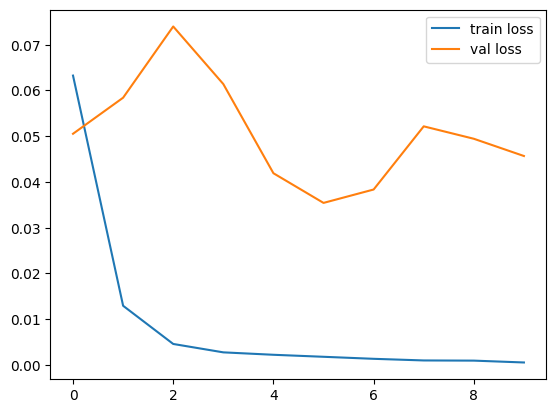

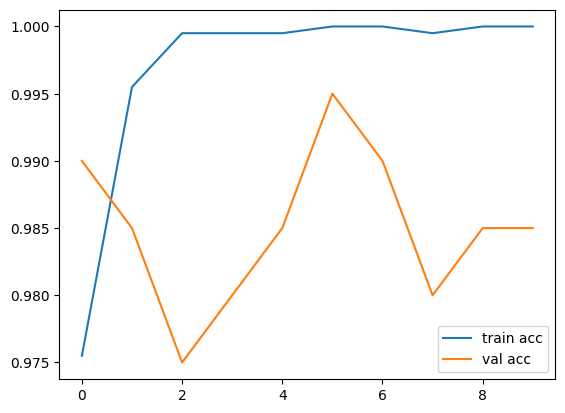

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

4/4 [==============================] - 1s 203ms/step
[[53 47]
 [44 56]]
              precision    recall  f1-score   support

       Crack       0.55      0.53      0.54       100
   Non Crack       0.54      0.56      0.55       100

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.54       200
weighted avg       0.55      0.55      0.54       200



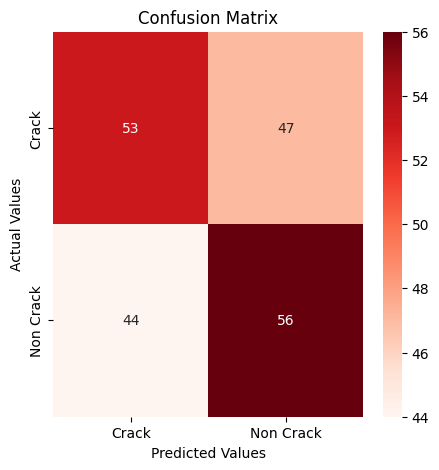

Accuracy: 54.50%


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns
import pandas as pd

# Get predicted classes for the validation set
prediction = resnet_model.predict(valid_generator)
pred = np.argmax(prediction, axis=1)

# Get the actual classes for the validation set
y_true = valid_generator.classes

class_names = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

# Generate confusion matrix
cm = confusion_matrix(y_true, pred)
print(cm)

# Print classification report
report = classification_report(y_true, pred, target_names=class_names)
print(report)

# Create pandas dataframe for confusion matrix
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

# Plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm_df, annot=True,cmap='Reds', fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Print accuracy score
accuracy = accuracy_score(y_true, pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))